##Introduction

In today’s highly competitive retail environment, understanding customer purchasing behavior is essential for improving sales and optimizing business strategies. Retailers collect massive amounts of transactional data on a daily basis, but these raw records often fail to provide actionable insights on their own. Market Basket Analysis (MBA) is a powerful data mining technique that uncovers associations and patterns within transactional data, helping businesses identify products that are frequently purchased together.

The dataset under consideration consists of customer transactions with product-level details. By applying the Apriori algorithm, frequent itemsets and association rules are derived, providing valuable insights into product affinities. These insights can guide decision-making in areas such as product placement, cross-selling strategies, promotional campaigns, and inventory management.

#Problem Statement

Despite having access to large volumes of sales data, businesses often struggle to translate this information into meaningful strategies. Key challenges include:

Identifying frequent purchase patterns: Which products are most commonly bought together?

Uncovering hidden relationships: Are there non-obvious product pairings (e.g., household items with groceries) that could inform new promotions or store layouts?

Driving business decisions: How can discovered patterns be leveraged to improve product placement, promotions, and inventory planning?

The goal of this project is to use Market Basket Analysis on transactional data to extract frequent itemsets and generate association rules. These rules will be analyzed to recommend strategies that enhance sales performance, improve customer experience, and optimize business operations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Member_number,0
Date,0
itemDescription,0


In [ ]:
df['date']=pd.to_datetime(df['Date'])
df.head()

/tmp/ipython-input-3513774185.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date']=pd.to_datetime(df['Date'])


,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


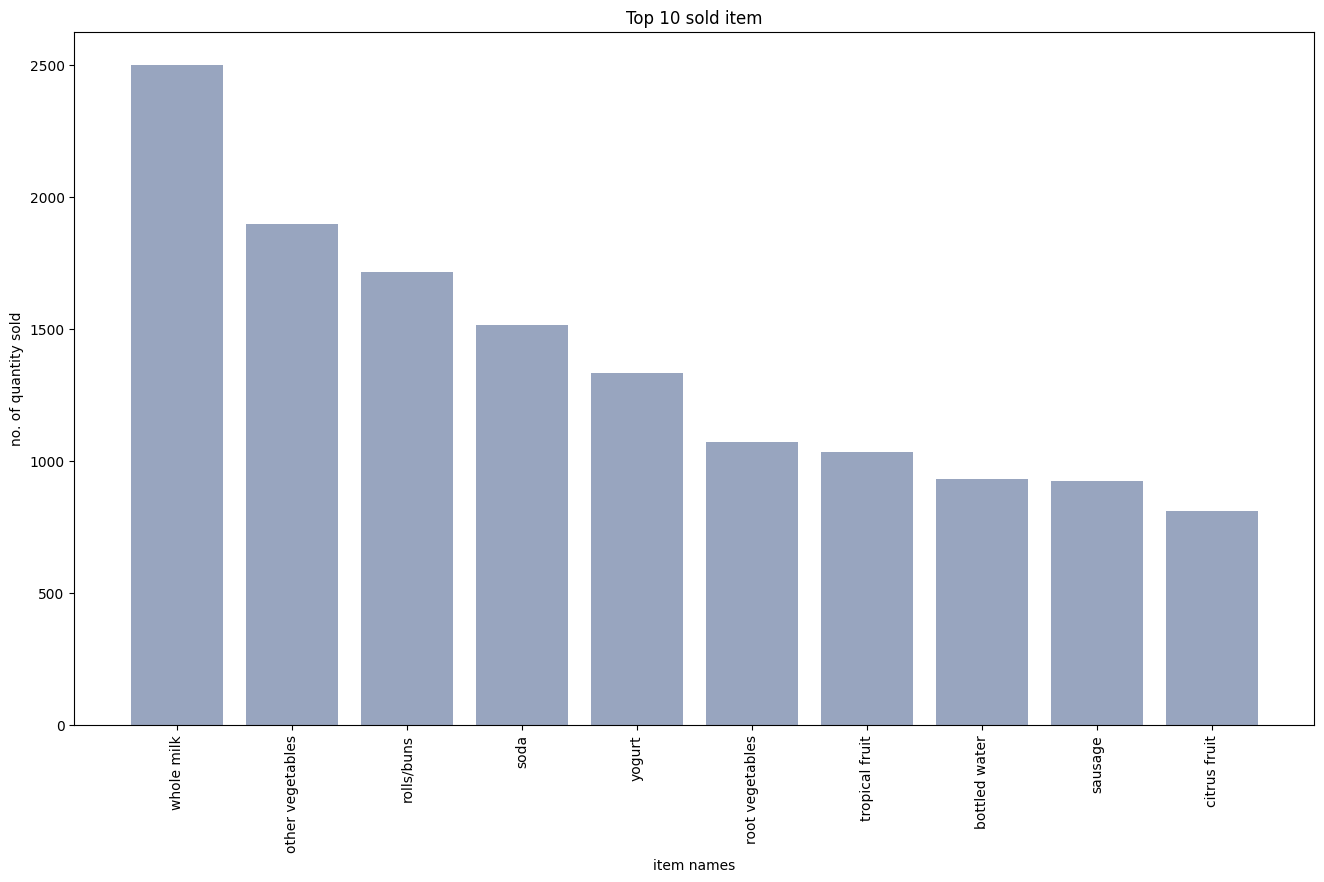

In [ ]:
item_distr=df.groupby(by='itemDescription').size().reset_index(name='frequency').sort_values(by='frequency',ascending=False).head(10)

bars=item_distr['itemDescription']
height=item_distr['frequency']
x_pos=np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 sold item")
plt.xlabel("item names")
plt.ylabel("no. of quantity sold")
plt.xticks(x_pos,bars,rotation=90)
plt.show()

In [ ]:
df_date=df.set_index('Date')
df_date.head()

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01


In [ ]:
df_date = df_date.set_index('date')


/tmp/ipython-input-3093261373.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_date.resample('M')['itemDescription'].count().plot(


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of items sold')]

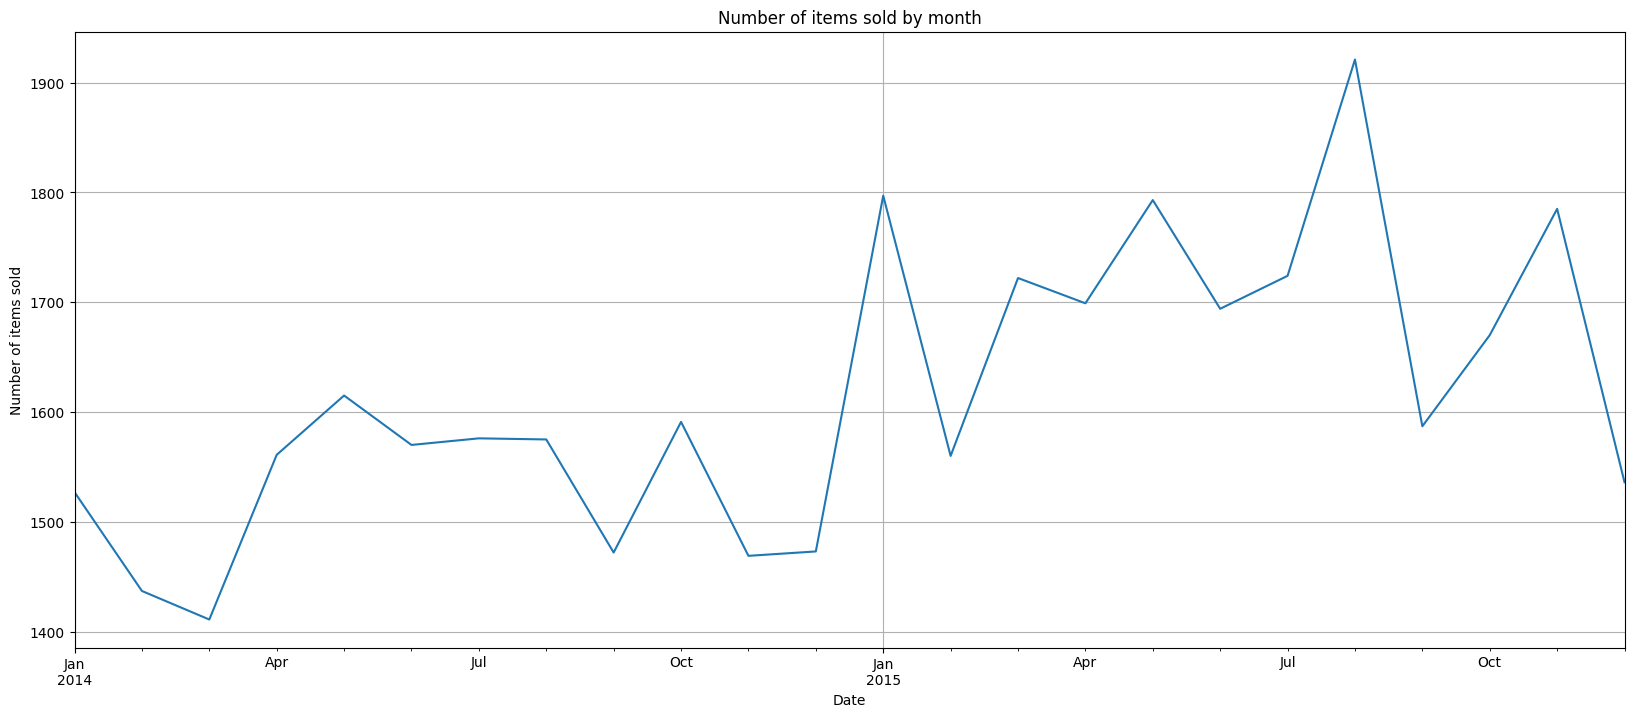

In [ ]:
df_date.resample('M')['itemDescription'].count().plot(
    figsize=(20,8),
    grid=True,
    title='Number of items sold by month'
).set(
    xlabel="Date",
    ylabel="Number of items sold"
)

In [ ]:
cust_level=df[["Member_number",'itemDescription']].sort_values(by='Member_number',ascending=False)
cust_level["itemDescription"]=cust_level["itemDescription"].str.strip()
cust_level.head()


,Member_number,itemDescription
34885,5000,semi-finished bread
25489,5000,other vegetables
3578,5000,soda
27877,5000,onions
9340,5000,bottled beer


In [ ]:
transactions=[a[1]['itemDescription'].tolist()for a in list (cust_level.groupby(['Member_number']))]


In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=d47720861988a48cf1abb26f861e2095588f0fe7085bddba024b72ed972a9e4b
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [ ]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2,max_length=2)
results=list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]
    rhs=[tuple(result[2][0][1])[0] for result in results]
    supports=[result[1] for result in results]
    confidences=[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts))
resultsinDataFrame=pd.DataFrame(inspect(results),columns=['Left Hand Side','Right Hand Side','Support','Confidence','Lift'])

In [ ]:
resultsinDataFrame.nlargest(n=10,columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,rice,napkins,0.003079,0.244898,3.011395
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239


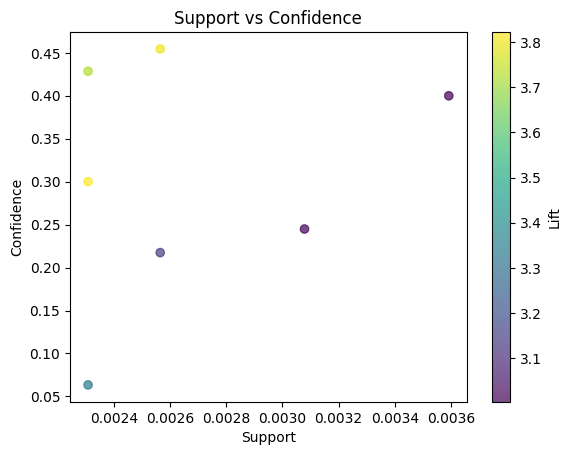

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(resultsinDataFrame['Support'],resultsinDataFrame['Confidence'],c=resultsinDataFrame['Lift'],cmap='viridis',alpha=0.7)
colorbar=plt.colorbar()
colorbar.set_label('Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

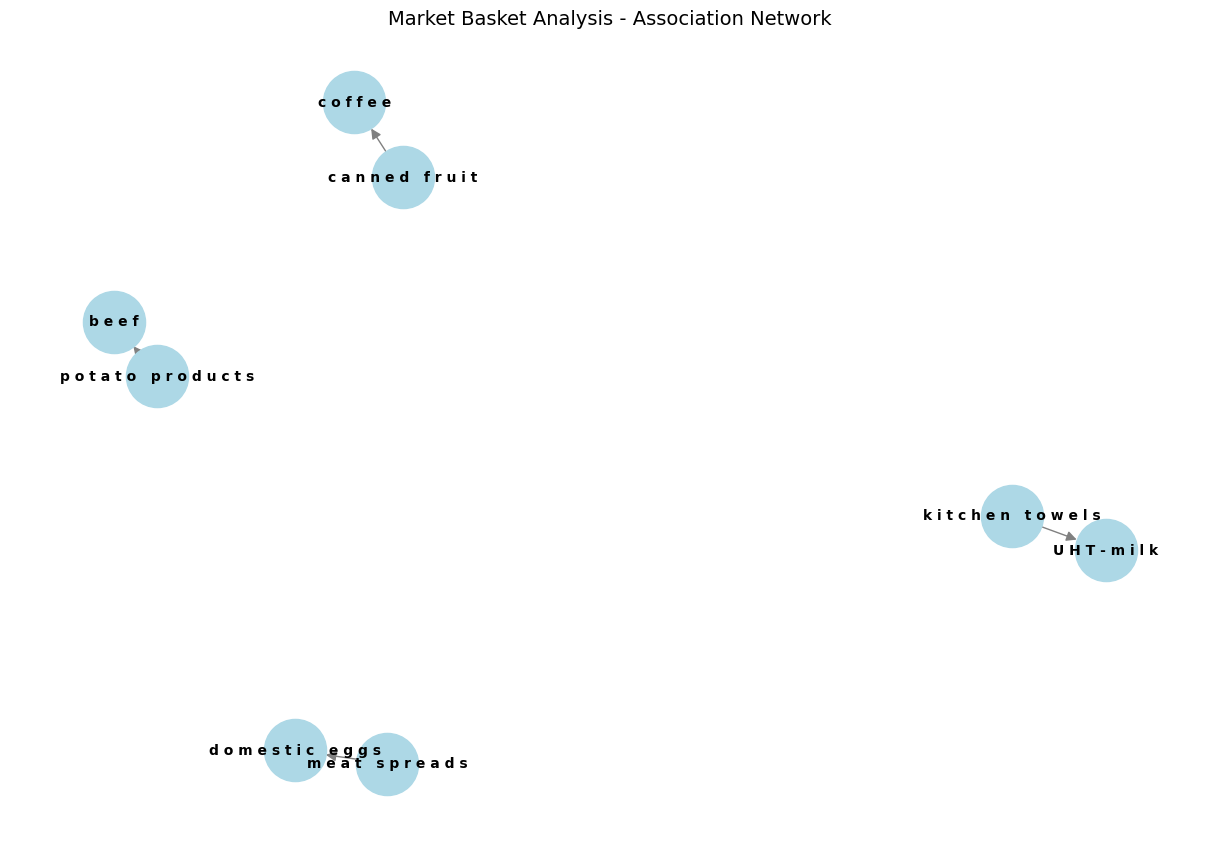

In [ ]:
import networkx as nx

G = nx.DiGraph()

for i, row in strong_rules.iterrows():
    G.add_edge(' '.join(row['Left Hand Side']), ' '.join(row['Right Hand Side']),
               weight=row['Lift'], confidence=row['Confidence'])

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=10, font_weight='bold',
        arrowsize=15, edge_color='gray')
plt.title("Market Basket Analysis - Association Network", fontsize=14)
plt.show()



##Business Recommendations from Market Basket Analysis
1. Kitchen Towels → UHT Milk (Lift 3.82, Confidence 30%)

Customers who buy kitchen towels are much more likely to also buy UHT milk.

Recommendation:

Place UHT milk in or near the household essentials aisle.

Offer bundle promotions (e.g., “Buy Kitchen Towels, get 10% off UHT Milk”).

2. Potato Products → Beef (Lift 3.80, Confidence 45%)

Strong relationship: nearly half of potato product buyers also buy beef.

Recommendation:

Bundle items (e.g., “Steak + Fries Pack”).

Promote beef alongside potato items in flyers/ads.

Stock them nearby in fresh food/freezer sections.

3. Canned Fruit → Coffee (Lift 3.73, Confidence 42%)

Shoppers buying canned fruit often add coffee.

Recommendation:

Create “Breakfast/Brunch” themed promotions.

Place small coffee displays in canned fruit aisles.

4. Flour → Mayonnaise (Lift 3.34, but Low Confidence 6%)

Weak confidence → not a strong buying pattern.

Recommendation:

Ignore for now (likely noise or rare behavior).

Could test small “baking & cooking” cross-promotions (flour + condiments).

5. Sparkling Wine → Waffles (Lift 3.15, Confidence 21%)

Customers buying sparkling wine also grab waffles, possibly for celebrations.

Recommendation:

Promote party bundles (Wine + Waffles).

Position waffles in holiday/seasonal aisles with wine for festive shoppers.

6. Rice → Napkins (Lift 3.01, Confidence 24%)

Shoppers buying rice also tend to buy napkins.

Recommendation:

Cross-sell household staples: "Pantry + Kitchen Essentials".

Place napkins in or near staple food aisles.

7. Meat Spreads → Domestic Eggs (Lift 3.00, Confidence 40%)

Meat spreads buyers frequently buy eggs.

Recommendation:

Create breakfast bundles (Eggs + Spreads).

Place spreads closer to egg refrigerators.

Use online recommendations: “Bought Meat Spreads? Add Eggs”.

##Strategic Takeaways

Product Placement: Group commonly purchased items (e.g., beef & potatoes, eggs & spreads).

Cross-Selling Promotions: Use strong pairs for bundle discounts and seasonal offers.

Inventory Planning: Stock higher quantities of paired products together during peak shopping times.

E-Commerce Applications: Implement “Frequently Bought Together” suggestions using these rules.